In [1]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.0 MB/s eta 0:00:00


In [2]:
!mkdir images

In [3]:
import mtcnn

In [5]:
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt

In [6]:
# load image from file:
pixels = plt.imread('./images/test4.jpg')

In [7]:
detector = MTCNN()
results = detector.detect_faces(pixels)

2/2 [==============================] - 0s 142ms/step


In [8]:
results
# MTCNN --> Multi Task CNN
# result is a list of dictionaries:
# box : x, y, width, height
# confidence: binary classification
# keypoints : landmarks

[{'box': [543, 232, 61, 79],
  'confidence': 0.9999998807907104,
  'keypoints': {'left_eye': (560, 259),
   'right_eye': (588, 261),
   'nose': (573, 275),
   'mouth_left': (562, 290),
   'mouth_right': (583, 291)}},
 {'box': [430, 281, 57, 71],
  'confidence': 0.9999938011169434,
  'keypoints': {'left_eye': (449, 304),
   'right_eye': (474, 312),
   'nose': (459, 323),
   'mouth_left': (442, 329),
   'mouth_right': (469, 336)}},
 {'box': [499, 464, 58, 72],
  'confidence': 0.999975323677063,
  'keypoints': {'left_eye': (510, 491),
   'right_eye': (536, 484),
   'nose': (524, 502),
   'mouth_left': (519, 518),
   'mouth_right': (540, 512)}},
 {'box': [904, 190, 78, 94],
  'confidence': 0.9999547004699707,
  'keypoints': {'left_eye': (918, 230),
   'right_eye': (950, 218),
   'nose': (932, 243),
   'mouth_left': (929, 265),
   'mouth_right': (958, 255)}},
 {'box': [785, 265, 63, 86],
  'confidence': 0.9999363422393799,
  'keypoints': {'left_eye': (798, 300),
   'right_eye': (827, 295),


In [9]:
new_results = []
for i in range(len(results)):
    if results[i]['confidence'] > 0.95:
        new_results.append(results[i])

In [10]:
new_results

[{'box': [543, 232, 61, 79],
  'confidence': 0.9999998807907104,
  'keypoints': {'left_eye': (560, 259),
   'right_eye': (588, 261),
   'nose': (573, 275),
   'mouth_left': (562, 290),
   'mouth_right': (583, 291)}},
 {'box': [430, 281, 57, 71],
  'confidence': 0.9999938011169434,
  'keypoints': {'left_eye': (449, 304),
   'right_eye': (474, 312),
   'nose': (459, 323),
   'mouth_left': (442, 329),
   'mouth_right': (469, 336)}},
 {'box': [499, 464, 58, 72],
  'confidence': 0.999975323677063,
  'keypoints': {'left_eye': (510, 491),
   'right_eye': (536, 484),
   'nose': (524, 502),
   'mouth_left': (519, 518),
   'mouth_right': (540, 512)}},
 {'box': [904, 190, 78, 94],
  'confidence': 0.9999547004699707,
  'keypoints': {'left_eye': (918, 230),
   'right_eye': (950, 218),
   'nose': (932, 243),
   'mouth_left': (929, 265),
   'mouth_right': (958, 255)}},
 {'box': [785, 265, 63, 86],
  'confidence': 0.9999363422393799,
  'keypoints': {'left_eye': (798, 300),
   'right_eye': (827, 295),


In [11]:
def draw_facebox(filename, result_list):
    data = plt.imread(filename)
    plt.imshow(data)
    ax = plt.gca()

    for result in result_list:
        x, y, width, height = result['box'] # coordinates
        rect = plt.Rectangle((x, y), width, height, fill=False, color='yellow') # create the shape
        ax.add_patch(rect)

    plt.show()

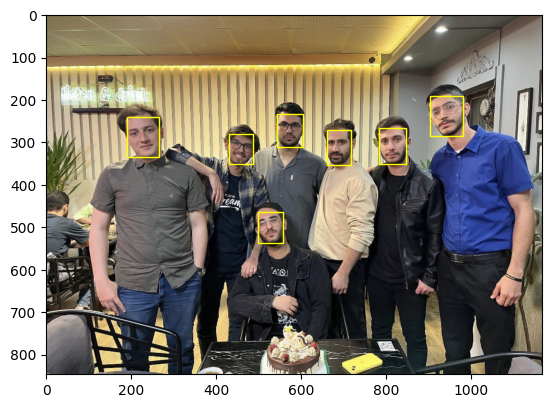

In [12]:
draw_facebox('./images/test4.jpg', new_results)

In [15]:
def draw_facebox_and_keypoints(filename, result_list):
    data = plt.imread(filename)
    plt.imshow(data)
    ax = plt.gca()

    for result in result_list:

        x, y, width, height = result['box']
        rect = plt.Rectangle((x, y), width, height,fill=False, color='yellow')
        ax.add_patch(rect)

        for key, value in result['keypoints'].items(): # draw the dots
            dot = plt.Circle(value, radius=1.2, color='red')
            ax.add_patch(dot)

    plt.show()

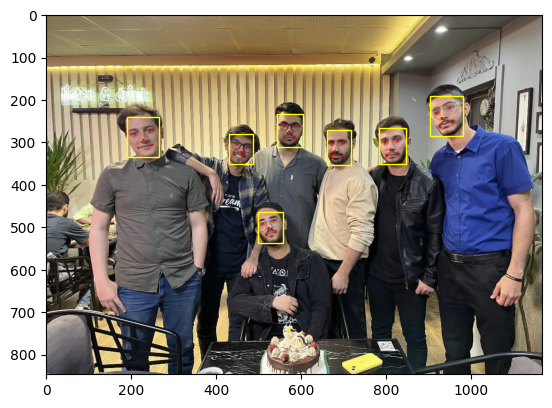

In [16]:
draw_facebox_and_keypoints('./images/test4.jpg', new_results)